In [1]:
#!pip install sentence-transformers

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

''';

In [3]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    
    pca = PCA(n_components=p)
    red_mat = pca.fit_transform(mat)
    
    red_mat = mat[:,:p]
    
    return pca, red_mat

In [4]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Nombre de composantes")
    plt.ylabel("Pourcentage de variance expliquée")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)


In [5]:
def display_factorial_planes(X_projected, pca, n_components=20):
    for i in range(n_components - 1):
        for j in range(i + 1, n_components):
            plt.figure(figsize=(7, 6))
            plt.scatter(X_projected[:, i], X_projected[:, j], alpha=0.5)
            plt.xlabel(f'PC{i + 1} ({pca.explained_variance_ratio_[i] * 100:.1f}%)')
            plt.ylabel(f'PC{j + 1} ({pca.explained_variance_ratio_[j] * 100:.1f}%)')
            plt.title(f'Plan factoriel PC{i + 1} - PC{j + 1}')
            plt.show()

In [6]:
def display_individuals(X_projected):
    plt.figure(figsize=(7, 6))
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=labels, alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Projection des individus sur PC1 et PC2')
    plt.colorbar()
    plt.show()


In [7]:
def find_optimal_clusters(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

In [8]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    
     # Initialise le modèle KMeans avec k clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    
    # Adapte le modèle aux données et prédit les clusters
    pred = kmeans.fit_predict(mat)
    
    return pred

In [9]:
# import data
ng20 = fetch_20newsgroups(subset='test')

In [10]:
corpus = ng20.data[:2000]

In [11]:
labels = ng20.target[:2000]

In [12]:
k = len(set(labels))

In [13]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [14]:
# perform dimentionality reduction
pca, red_emb = dim_red(embeddings, 20)

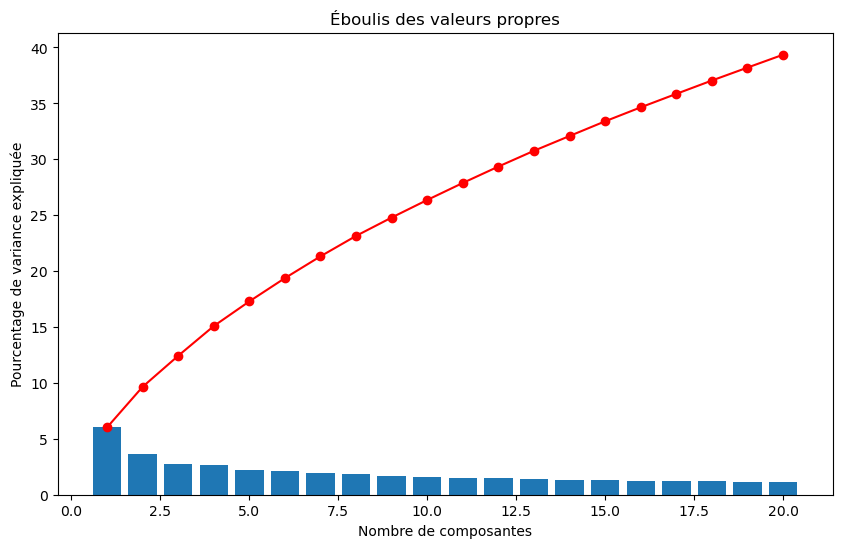

In [15]:
display_scree_plot(pca)

In [16]:
#display_factorial_planes(red_emb,pca,20)

In [17]:
#display_individuals(red_emb)

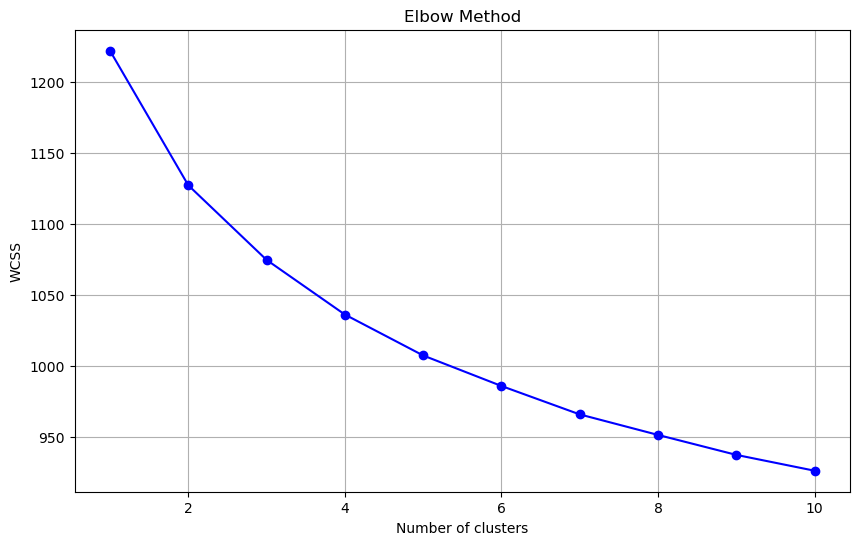

In [18]:
# Trouver le nombre optimal de clusters 
find_optimal_clusters(red_emb)

In [19]:
nmi_list = []
ari_list = []
nb_cluster = [2,3,4,5,6,7,8,9,10]

In [20]:
for i in nb_cluster:
    # perform clustering
    pred = clust(red_emb, i)
    
    # evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred,labels)
    ari_score = adjusted_rand_score(pred,labels)

    print(f'Pour {i} cluster :\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')
    
    nmi_list.append(nmi_score)
    ari_list.append(ari_score)

Pour 2 cluster :
NMI: 0.07 
ARI: 0.02

Pour 3 cluster :
NMI: 0.11 
ARI: 0.04

Pour 4 cluster :
NMI: 0.13 
ARI: 0.05

Pour 5 cluster :
NMI: 0.15 
ARI: 0.07

Pour 6 cluster :
NMI: 0.16 
ARI: 0.07

Pour 7 cluster :
NMI: 0.17 
ARI: 0.08

Pour 8 cluster :
NMI: 0.16 
ARI: 0.08

Pour 9 cluster :
NMI: 0.17 
ARI: 0.07

Pour 10 cluster :
NMI: 0.17 
ARI: 0.08



In [21]:
np.mean(nmi_list)

0.14441398479655718

In [22]:
np.mean(ari_list)

0.06207491871973195